In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
""" I. Bloch
"""


#%% SECTION 1 inclusion of packages 


import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
# necessite scikit-image 
from skimage import io as skio
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from skimage import img_as_float
from skimage.segmentation import chan_vese
from skimage.segmentation import checkerboard_level_set
from skimage.segmentation import disk_level_set
import itertools

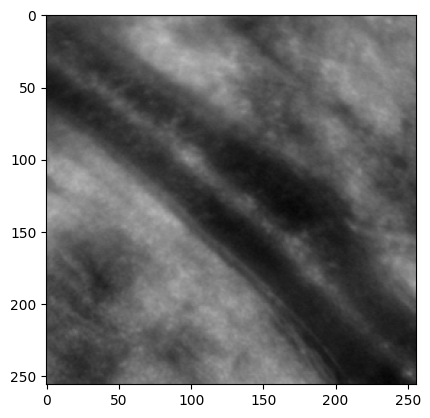

In [4]:
#%% SECTION 2 - Input image

#im=skio.imread('images/coeurIRM.bmp')

im=skio.imread('images/retineOA.bmp')

#im=skio.imread('images/brain.bmp')
#im=im[:,:,1]

#im=skio.imread('images/brain2.bmp')

plt.imshow(im, cmap="gray", vmin=0, vmax=255)

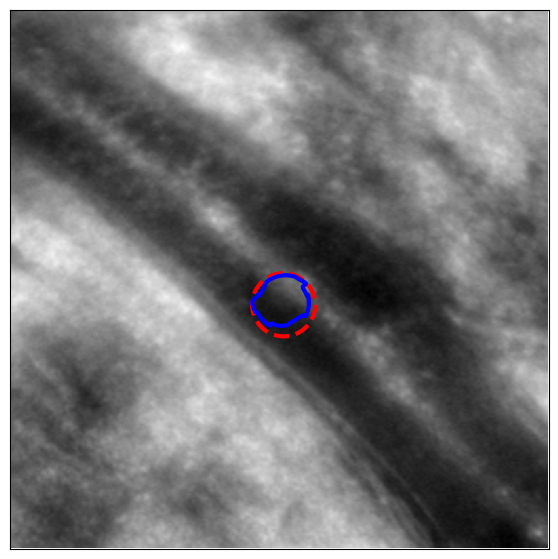

In [5]:
#%% SECTION 3a - Segmentation using active contours 

s = np.linspace(0, 2*np.pi, 100)
r = 140 + 15*np.sin(s)
c = 130 + 15*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(im, 0.1),
                       init, alpha=0.5, beta=5, w_edge=20, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(im, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, im.shape[1], im.shape[0], 0])

plt.show()

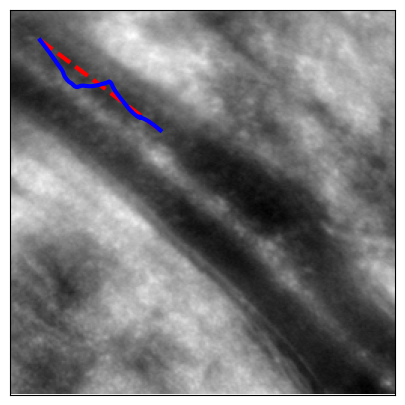

In [22]:
#%% SECTION 3b - Open contours

# Use retineOA.bmp

r = np.linspace(20, 80, 100)
c = np.linspace(20, 100, 100)
init = np.array([r, c]).T

snake = active_contour(gaussian(im, 1), init, boundary_condition='fixed',
                       alpha=0.01, beta=2, w_line=0, w_edge=10, gamma=0.01)

fig, ax = plt.subplots(figsize=(9, 5))
ax.imshow(im, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, im.shape[1], im.shape[0], 0])

plt.show()

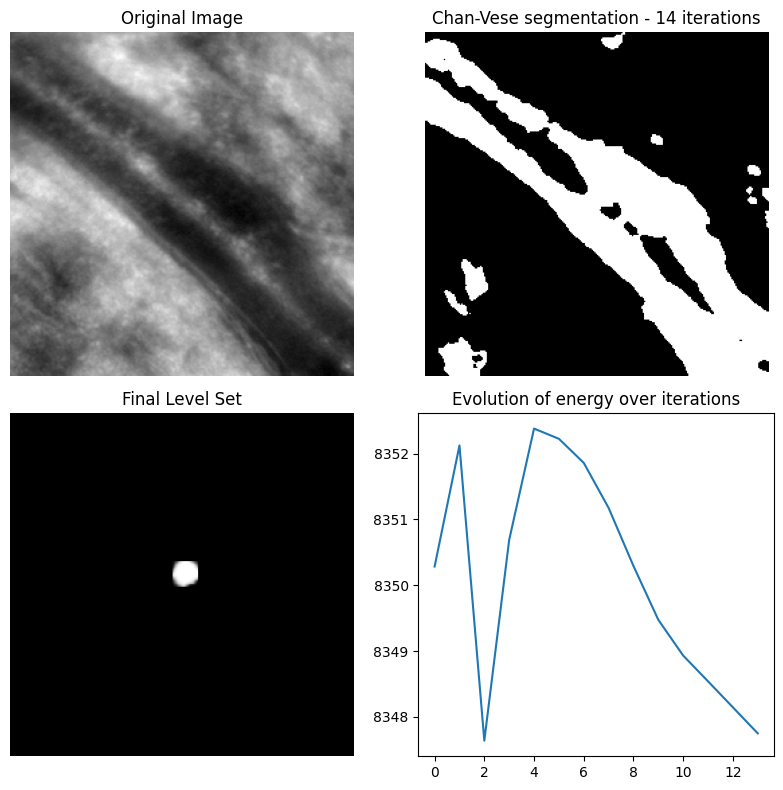

In [107]:
#%% SECTION 4 - Segmentation using level sets (and region homogeneity)

image = img_as_float(im)

# Init avec un damier
#init_ls = checkerboard_level_set(image.shape, 6)

# Init avec un cercle
init_ls = disk_level_set (image.shape, center=(120,130), radius=10)

# Init avec plusieurs cercles
"""
circleNum = 8
circleRadius = image.shape[0] / (3*circleNum)
circleStep0 = image.shape[0]/(circleNum+1)
circleStep1 = image.shape[1]/(circleNum+1)
init_ls = np.zeros(image.shape)
for i in range(circleNum):
        for j in range(circleNum):
            init_ls = init_ls + disk_level_set (image.shape, 
                                                  center=((i+1)*circleStep0, (j+1)*circleStep1), radius=circleRadius)
"""

cv = chan_vese(image, mu=0.25, lambda1=5, lambda2=1, tol=1e-3, max_num_iter=200,
               dt=0.5, init_level_set=init_ls, extended_output=True)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()

TP 2-  DEFORMABLE MODELS

1.1 Parameters
we applied the segmentation method based on parametric active contours by varying its parameters in order to understand better their role and effect on the segmentation result

Closed contour initialization

In [60]:
#to segment an image
#closed contour
def segm_active_contours_close(image, sigma, alpha, beta, w_edge, gamma, ax=None):
    im = skio.imread(image)
    s = np.linspace(0, 2 * np.pi, 100)
    r = 140 + 15 * np.sin(s)
    c = 130 + 15 * np.cos(s)
    init = np.array([r, c]).T

    snake = active_contour(gaussian(im, sigma), init, alpha, beta, w_edge, gamma)

    if ax is None:
        fig, ax = plt.subplots(figsize=(7, 7))
        plt.title(f"sigma={sigma}, alpha={alpha},\n beta={beta}, w_edge={w_edge},\n gamma={gamma}")
    
    ax.imshow(im, cmap=plt.cm.gray)
    ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
    ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
    ax.set_xticks([]), ax.set_yticks([])
    ax.axis([0, im.shape[1], im.shape[0], 0])

/var/folders/x8/222yvgk53cv8_hr5kjq42qnw0000gn/T/ipykernel_96531/3647675336.py:10: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.21. Set `channel_axis=-1` explicitly to silence this warning.
  snake = active_contour(gaussian(im, sigma), init, alpha, beta, w_edge, gamma)


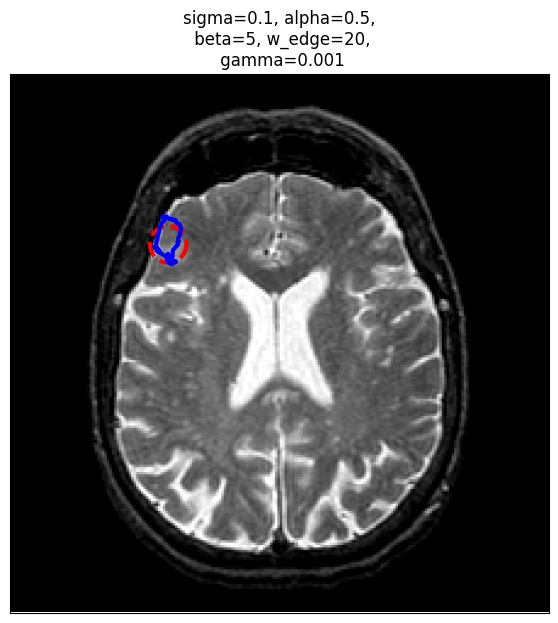

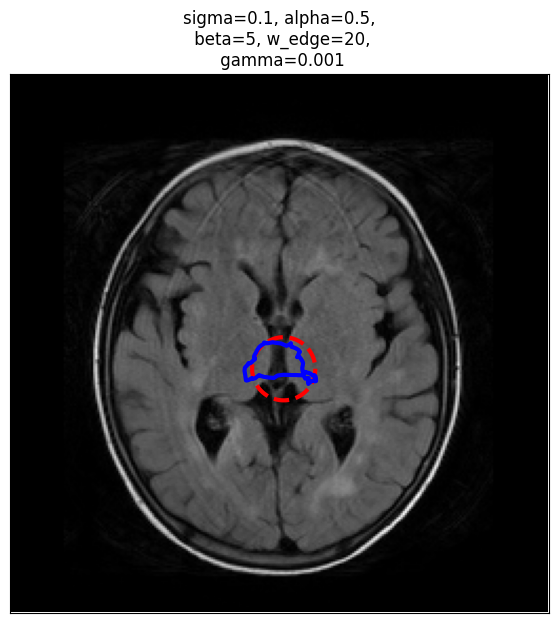

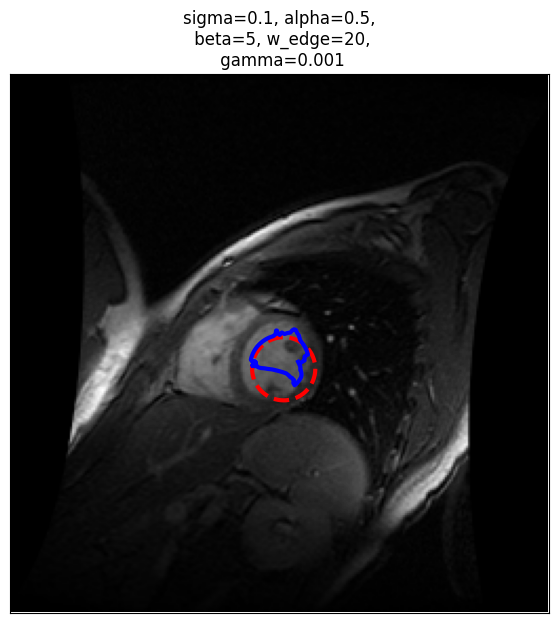

In [61]:
segm_active_contours_close("images/brain.bmp", 0.1 , 0.5, 5, 20, 0.001)
segm_active_contours_close("images/brain2.bmp",0.1, 0.5, 5, 20, 0.001 )
segm_active_contours_close("images/coeurIRM.bmp",0.1, 0.5, 5, 20, 0.001 )

In [ ]:
#mia bozza
def segm_active_contours_close_varParam(image,sigma, alphas, betas, w_edge, gamma):
    fig = plt.figure(figsize=(12, 9))
    for i, alpha in enumerate(alphas):
        for j, beta in enumerate(betas):
            i_sub = i * len(betas) + j + 1
            plt.subplot(1, len(betas)*len(alphas), i_sub)
            snake = segm_active_contours_close(image, sigma, alpha, beta, w_edge, gamma)
        
    plt.show()

In [73]:
#to segment an image with different values of alpha and beta
#closed contour
def segm_active_contours_close_varAB(image, sigma, alphas, betas, w_edge, gamma):
    num_alphas = len(alphas)
    num_betas = len(betas)

    num_combinations = num_alphas * num_betas
    fig, axes = plt.subplots(1, num_combinations, figsize=(12, 9))
    in_sub=0
    for alpha in alphas:
        for beta in betas:
            ax = axes[in_sub]
            snake = segm_active_contours_close(image, sigma, alpha, beta, w_edge, gamma, ax)
            ax.set_title(f"alpha={alpha}, beta={beta}")
            in_sub+=1

    plt.tight_layout()
    plt.show()

/var/folders/x8/222yvgk53cv8_hr5kjq42qnw0000gn/T/ipykernel_96531/3647675336.py:10: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.21. Set `channel_axis=-1` explicitly to silence this warning.
  snake = active_contour(gaussian(im, sigma), init, alpha, beta, w_edge, gamma)


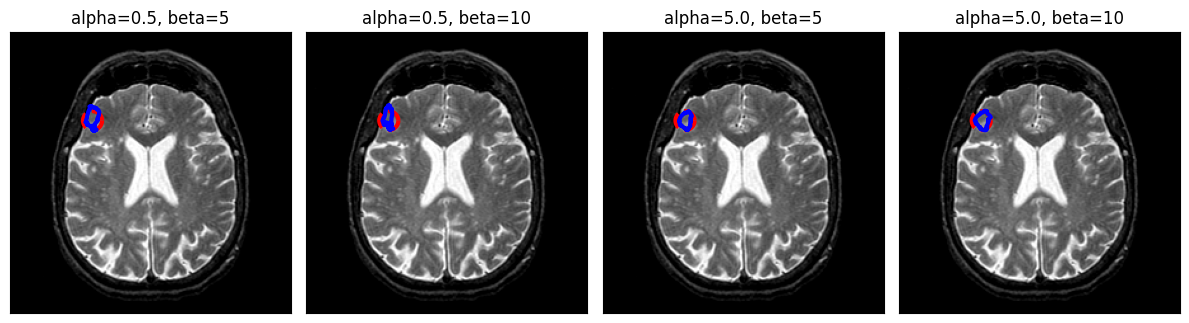

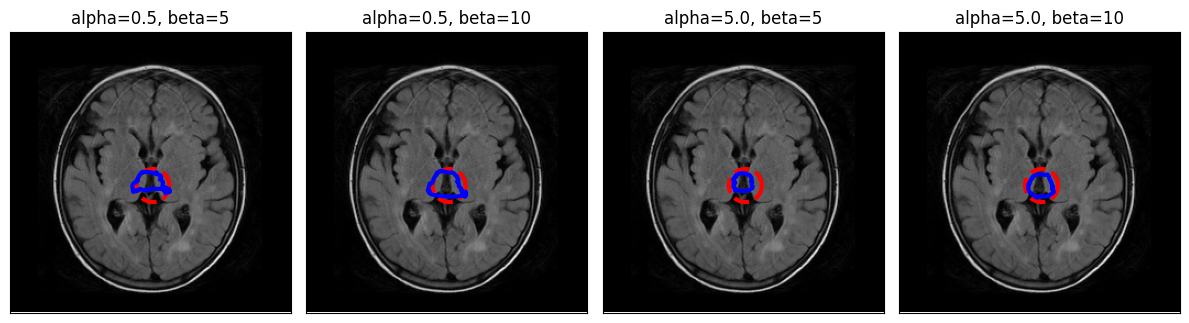

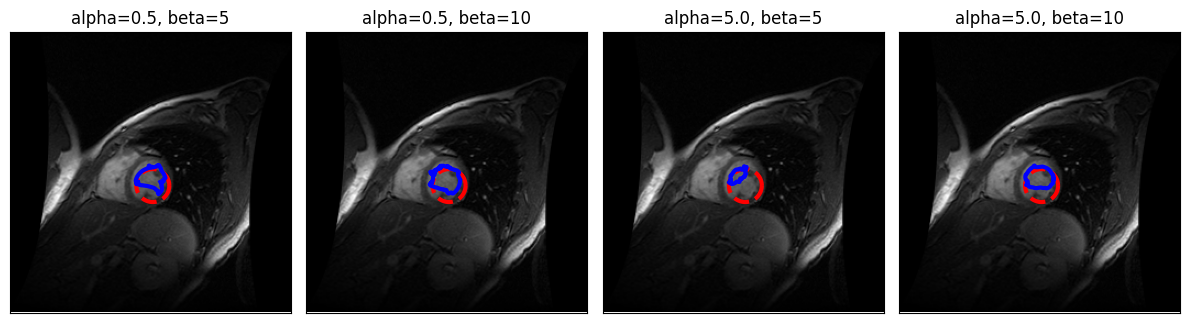

In [99]:
segm_active_contours_close_varAB("images/brain.bmp", 0.1, [0.5, 5.0], [5, 10], 20, 0.001)
segm_active_contours_close_varAB("images/brain2.bmp", 0.1, [0.5, 5.0], [5, 10], 20, 0.001)
segm_active_contours_close_varAB("images/coeurIRM.bmp", 0.1, [0.5, 5.0], [5, 10], 20, 0.001)


In [75]:
#to segment an image by changing the values of all the parameters
#closed contour
import itertools

def segm_active_contours_close_varParam(image, sigmas, alphas, betas, w_edges, gammas):
    num_sigmas = len(sigmas)
    num_alphas = len(alphas)
    num_betas = len(betas)
    num_w_edges = len(w_edges)
    num_gammas = len(gammas)

    num_comb = num_sigmas * num_alphas * num_betas * num_w_edges * num_gammas

    fig, axes = plt.subplots(1, num_comb, figsize=(12, 3))
    in_sub=0
    for sigma, alpha, beta, w_edge, gamma in itertools.product(sigmas, alphas, betas, w_edges, gammas):
        
        ax = axes[in_sub]
        snake = segm_active_contours_close(image, sigma, alpha, beta, w_edge, gamma, ax)
        ax.set_title(f"sigma={sigma}, alpha={alpha},\n beta={beta}, w_edge={w_edge},\n gamma={gamma}")
        in_sub += 1

    plt.tight_layout()
    plt.show()

/var/folders/x8/222yvgk53cv8_hr5kjq42qnw0000gn/T/ipykernel_96531/3647675336.py:10: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.21. Set `channel_axis=-1` explicitly to silence this warning.
  snake = active_contour(gaussian(im, sigma), init, alpha, beta, w_edge, gamma)


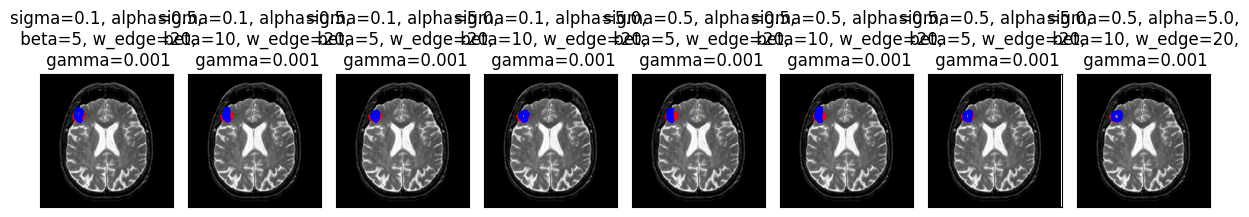

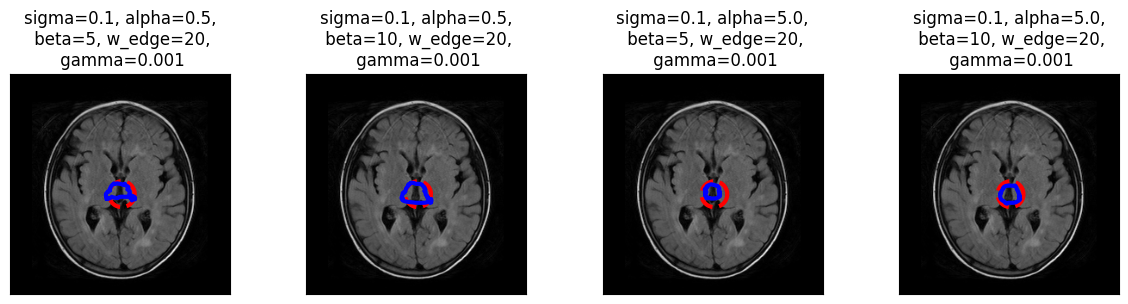

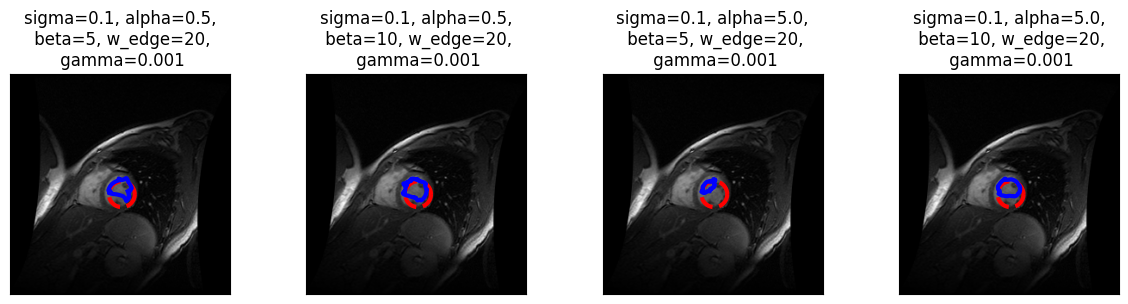

In [100]:
#default parameters if not given sigma=0.1, alpha=0.5, beta=5, w_edge=20, gamma=0.001
(def_sigma, def_alpha, def_beta, def_wedge, def_gamma)=([0.1], [0.5], [5], [20], [0.001])
segm_active_contours_close_varParam("images/brain.bmp", [0.1, 0.5], [0.5, 5.0], [5, 10], [20], [0.001])
segm_active_contours_close_varParam("images/brain2.bmp", def_sigma, [0.5, 5.0], [5, 10], [20], [0.001])
segm_active_contours_close_varParam("images/coeurIRM.bmp", [0.1], [0.5, 5.0], [5, 10], [20], [0.001])


Open contour initialization

In [84]:
#to segment an image
#open contour
def segm_active_contours_open(image, sigma, alpha, beta, w_line, w_edge, gamma, ax=None):
    im = skio.imread(image)
    r = np.linspace(20, 80, 100)
    c = np.linspace(20, 100, 100)
    init = np.array([r, c]).T

    snake = active_contour(gaussian(im, sigma), init, boundary_condition='fixed',
                        alpha=alpha, beta=beta, w_line=w_line, w_edge=w_edge, gamma=gamma)

    if ax is None:
        fig, ax = plt.subplots(figsize=(9, 5))
        plt.title(f"sigma={sigma}, alpha={alpha},\n beta={beta}, w_line={w_line}, w_edge={w_edge},\n gamma={gamma}")
    
    ax.imshow(im, cmap=plt.cm.gray)
    ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
    ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
    ax.set_xticks([]), ax.set_yticks([])
    ax.axis([0, im.shape[1], im.shape[0], 0])

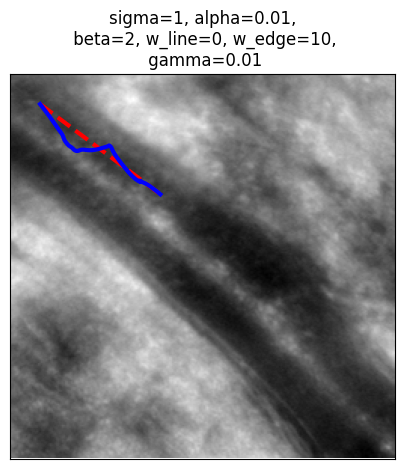

In [85]:
segm_active_contours_open("images/retineOA.bmp", 1, 0.01, 2, 0, 10, 0.01)

In [167]:
#to segment an image with different values of alpha and beta
#open contour
def segm_active_contours_open_varAB(image, sigma, alphas, betas, w_line, w_edge, gamma):
    num_alphas = len(alphas)
    num_betas = len(betas)

    num_combinations = num_alphas * num_betas
    fig, axes = plt.subplots(1, num_combinations, figsize=(12, 3))
    in_sub=0

    for alpha in alphas:
        for beta in betas:
            ax = axes[in_sub]
            segm_active_contours_open(image, sigma, alpha, beta, w_line,  w_edge, gamma, ax)
            ax.set_title(f"sigma={sigma}, alpha={alpha},\n beta={beta}, w_line={w_line}, w_edge={w_edge},\n gamma={gamma}")
            in_sub+=1

    plt.tight_layout()
    plt.show()

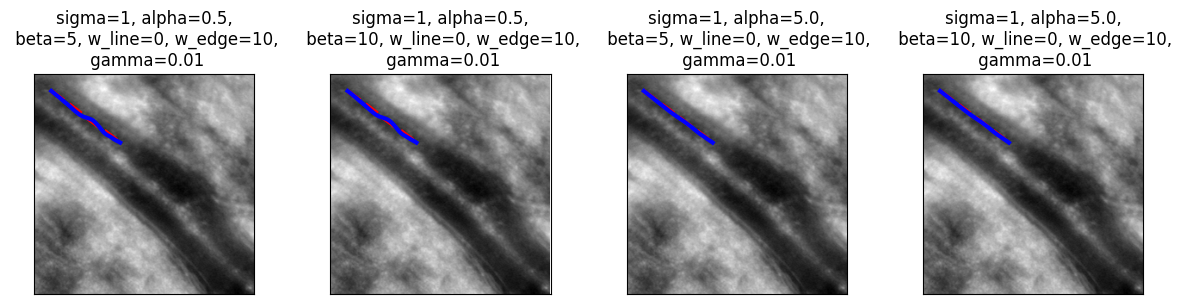

In [168]:
segm_active_contours_open_varAB("images/retineOA.bmp", 1, [0.5, 5.0], [5, 10], 0, 10, 0.01)

In [193]:
#to segment an image by changing the values of all the parameters
#open contour
import itertools

def segm_active_contours_open_varParam(image, sigmas, alphas, betas, w_lines, w_edges, gammas):
    num_sigmas = len(sigmas)
    num_alphas = len(alphas)
    num_betas = len(betas)
    num_wLines= len(w_lines)
    num_w_edges = len(w_edges)
    num_gammas = len(gammas)

    num_comb = num_sigmas * num_alphas * num_betas * num_wLines * num_w_edges * num_gammas

    fig, axes = plt.subplots(1, num_comb, figsize=(12, 3))
    in_sub=0
    for sigma, alpha, beta, w_line, w_edge, gamma in itertools.product(sigmas, alphas, betas, w_lines, w_edges, gammas):
        
        ax = axes[in_sub]
        segm_active_contours_open(image, sigma, alpha, beta, w_line,  w_edge, gamma, ax)
        ax.set_title(f"sigma={sigma}, alpha={alpha},\n beta={beta}, w_line={w_line}, w_edge={w_edge},\n gamma={gamma}")
        in_sub += 1

    plt.tight_layout()
    plt.show()

In [ ]:


def segm_active_contours_open_varParam(image, sigmas, alphas, betas, w_lines, w_edges, gammas):
    num_sigmas = len(sigmas)
    num_alphas = len(alphas)
    num_betas = len(betas)
    num_wLines= len(w_lines)
    num_w_edges = len(w_edges)
    num_gammas = len(gammas)

    num_comb = num_sigmas * num_alphas * num_betas * num_wLines * num_w_edges * num_gammas
    cv
    fig, axes = plt.subplots(1, num_comb, figsize=(12, 3))
    in_sub=0
    for sigma, alpha, beta, w_line, w_edge, gamma in itertools.product(sigmas, alphas, betas, w_lines, w_edges, gammas):
        
        ax = axes[in_sub]
        segm_active_contours_open(image, sigma, alpha, beta, w_line,  w_edge, gamma, ax)
        ax.set_title(f"sigma={sigma}, alpha={alpha},\n beta={beta}, w_line={w_line}, w_edge={w_edge},\n gamma={gamma}")
        in_sub += 1

    plt.tight_layout()
    plt.show()

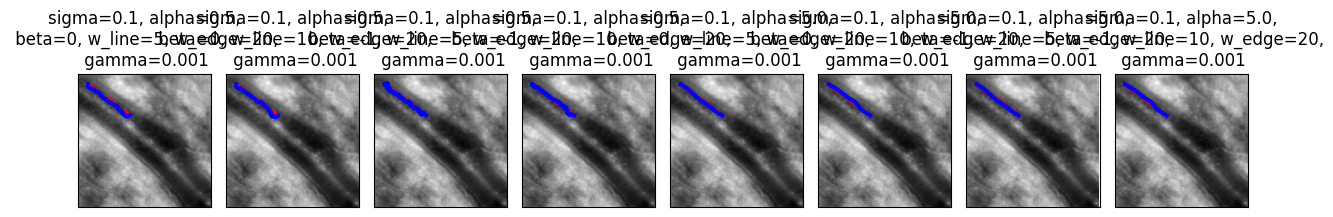

In [194]:
#default parameters if not given sigma=0.1, alpha=0.5, beta=5, w_edge=20, gamma=0.001
(def_sigma, def_alpha, def_beta, def_wline, def_wedge, def_gamma)=([1], [0.01], [2], [0], [10], [0.01])
segm_active_contours_open_varParam("images/retineOA.bmp", [0.1], [0.5, 5.0], [0, -1], [5, 10], [20], [0.001])

1.2 Parameters
we applied the segmentation method based on implicit representation using level sets by varying its parameters in order to understand better their role and effect on the segmentation result

In [115]:
def gris_depuis_couleur(im):
    """ Transforme une image couleur en image a niveaux de gris"""
    return im[:,:,:3].sum(axis=2)/3

In [185]:
#to segment an image
def segm_level_set(image, init, mu, lambda1, lambda2, tol, max_num_iter, dt, ax=None):
    im=skio.imread(image)
    im_float = img_as_float(im)
    #print(im.shape)
    #print(im_float.shape)
    if len(im_float.shape)>2 and im_float.shape[2]==3:
        im_float=gris_depuis_couleur(im_float)
    if init=="disk":
        init_ls = disk_level_set (im_float.shape, center=(120,130), radius=10)
    if init=="checkboard":
        init_ls = checkerboard_level_set(im_float.shape, 6)
    if init=="multi disk":
        circleNum = 8
        circleRadius = im_float.shape[0] / (3*circleNum)
        circleStep0 = im_float.shape[0]/(circleNum+1)
        circleStep1 = im_float.shape[1]/(circleNum+1)
        init_ls = np.zeros(im_float.shape)
        for i in range(circleNum):
            for j in range(circleNum):
                init_ls = init_ls + disk_level_set (im_float.shape, 
                                                    center=((i+1)*circleStep0, (j+1)*circleStep1), radius=circleRadius)
    cv = chan_vese(im_float, mu, lambda1, lambda2, tol, max_num_iter,
                dt, init_level_set=init_ls, extended_output=True)

    
    fig, axes = plt.subplots(2, 2, figsize=(8, 8))
    ax = axes.flatten()

    ax[0].imshow(im_float, cmap="gray")
    ax[0].set_axis_off()
    ax[0].set_title("Original im_float", fontsize=12)

    ax[1].imshow(cv[0], cmap="gray")
    ax[1].set_axis_off()
    title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
    ax[1].set_title(title, fontsize=12)

    ax[2].imshow(cv[1], cmap="gray")
    ax[2].set_axis_off()
    ax[2].set_title("Final Level Set", fontsize=12)

    ax[3].plot(cv[2])
    ax[3].set_title("Evolution of energy over iterations", fontsize=12)

    fig.tight_layout()
    return cv

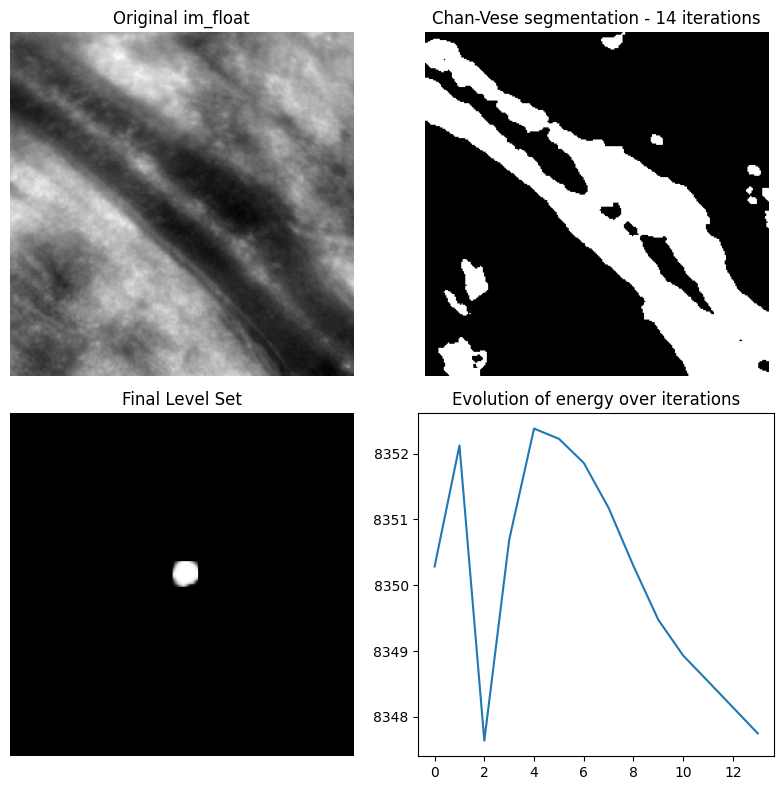

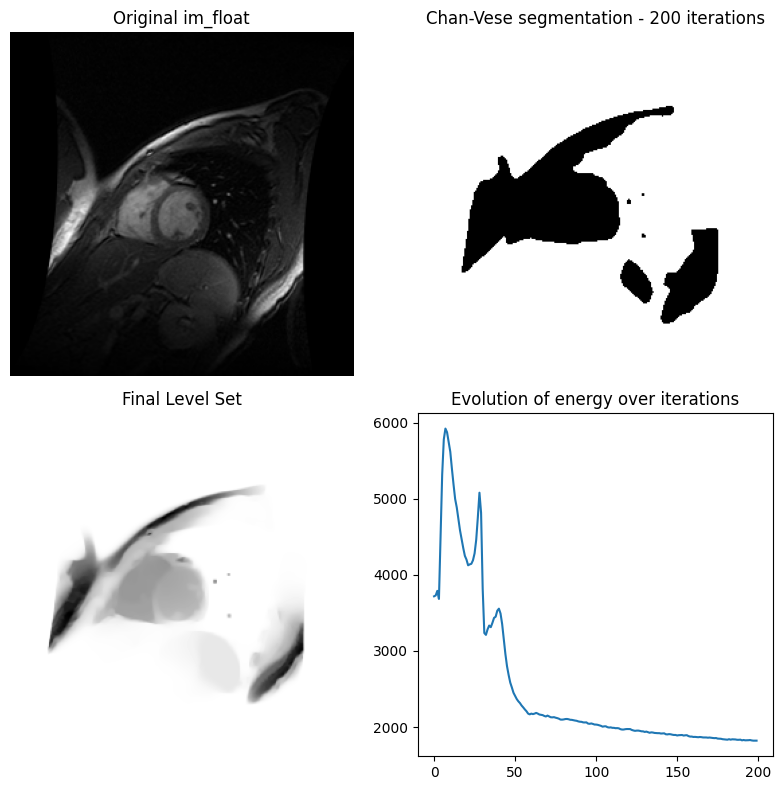

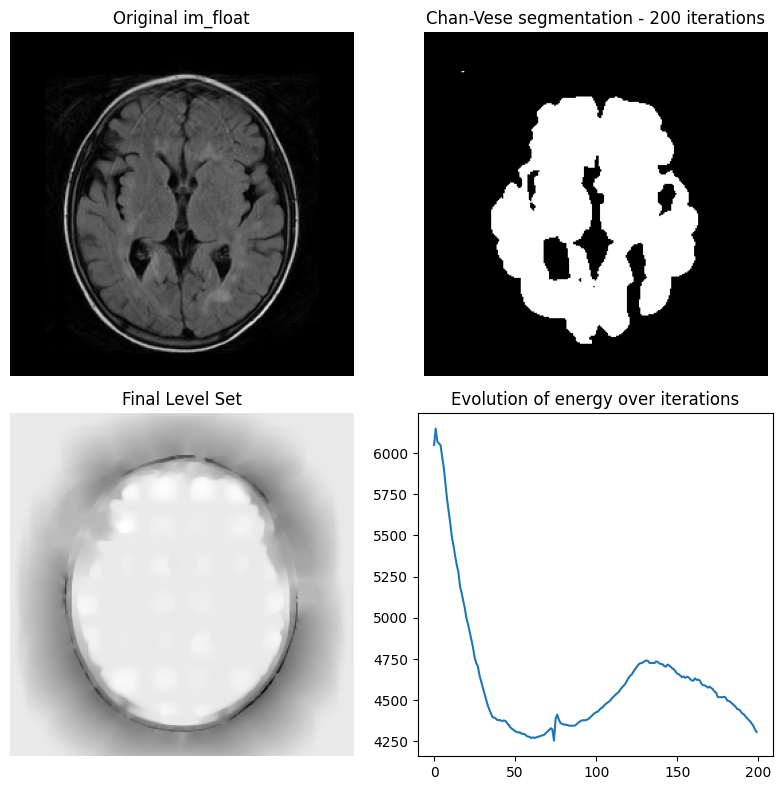

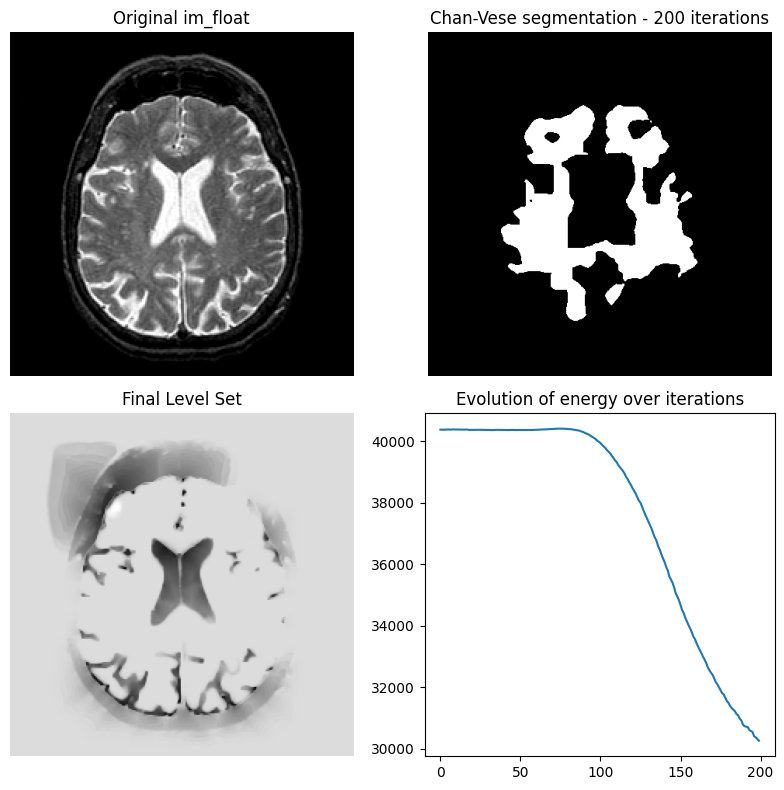

In [186]:
cv_retine=segm_level_set("images/retineOA.bmp", "disk", 0.25, 5, 1, 1e-3, 200, 0.5)
cv_coeur=segm_level_set("images/coeurIRM.bmp", "checkboard", 0.25, 5, 1, 1e-3, 200, 0.5)
cv_brain2=segm_level_set("images/brain2.bmp", "multi disk", 0.25, 5, 1, 1e-3, 200, 0.5)
cv_brain=segm_level_set("images/brain.bmp", "disk", 0.25, 5, 1, 1e-3, 200, 0.5)

In [204]:
#to segment an image varying the values of the parameters
def segm_level_set_varPar(image, inits, mus, lambda1s, lambda2s, tols, max_num_iters, dts):
    num_inits = len(inits)
    num_mus = len(mus)
    num_lambda1s = len(lambda1s)
    num_lambda2s= len(lambda2s)
    num_tols = len(tols)
    num_max_num_iters = len(max_num_iters)
    num_dts = len(dts)

    num_comb = num_inits * num_mus * num_lambda1s * num_lambda2s * num_tols *  num_max_num_iters * num_dts

    fig_ext, axes_ext = plt.subplots(1, num_comb, figsize=(12, 3))
    in_sub=0
    for init, mu, lambda1, lambda2, tol, max_num_iter, dt in itertools.product(inits, mus, lambda1s, lambda2s, tols, max_num_iters, dts):
        
        ax_ext = axes_ext[in_sub]
        cv = segm_level_set(image, init, mu, lambda1, lambda2, tol, max_num_iter, dt, ax)
        ax_ext.imshow(cv[0], cmap="gray")
        ax_ext.set_axis_off()
        title = f"init={init}, mu={mu},\nlambda1={lambda1}, lambda2={lambda2}, tol={tol},\nmax_num_iter={max_num_iter}, dt={dt}"
        ax_ext.set_title(title, fontsize=12)
        in_sub += 1

    plt.tight_layout()
    plt.show()

In [203]:
#prova->does not work
def segm_level_set_varPar1(image, inits, mus, lambda1s, lambda2s, tols, max_num_iters, dts):
    num_inits = len(inits)
    num_mus = len(mus)
    num_lambda1s = len(lambda1s)
    num_lambda2s= len(lambda2s)
    num_tols = len(tols)
    num_max_num_iters = len(max_num_iters)
    num_dts = len(dts)

    num_comb = num_inits * num_mus * num_lambda1s * num_lambda2s * num_tols *  num_max_num_iters * num_dts
    cv_results=[]
    
    for init, mu, lambda1, lambda2, tol, max_num_iter, dt in itertools.product(inits, mus, lambda1s, lambda2s, tols, max_num_iters, dts):
        
        cv = segm_level_set(image, init, mu, lambda1, lambda2, tol, max_num_iter, dt, ax)
        cv_results.append(cv)
    
    fig_ext, axes_ext = plt.subplots(1, num_comb, figsize=(12, 3))
    in_sub = 0
    for cv, (init, mu, lambda1, lambda2, tol, max_num_iter, dt) in zip(cv_results, itertools.product(
        inits, mus, lambda1s, lambda2s, tols, max_num_iters, dts
    )):
        ax_ext = axes_ext[in_sub]
        ax_ext.imshow(cv[0], cmap="gray")
        ax_ext.set_axis_off()
        title = f"init={init}, mu={mu},\nlambda1={lambda1}, lambda2={lambda2}, tol={tol},\nmax_num_iter={max_num_iter}, dt={dt}"
        ax_ext.set_title(title, fontsize=12)
        in_sub += 1

    plt.tight_layout()
    plt.show()

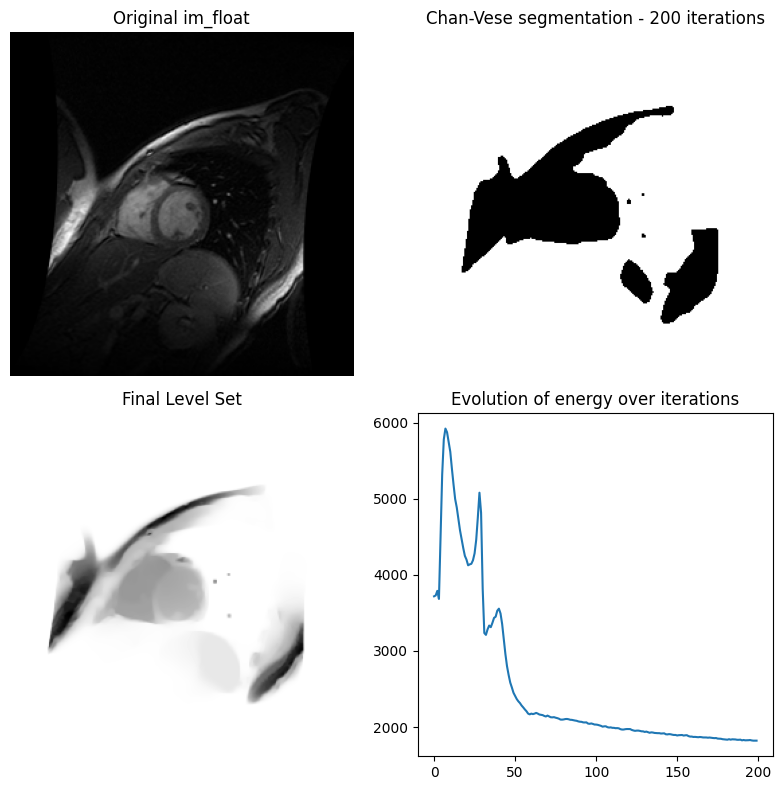

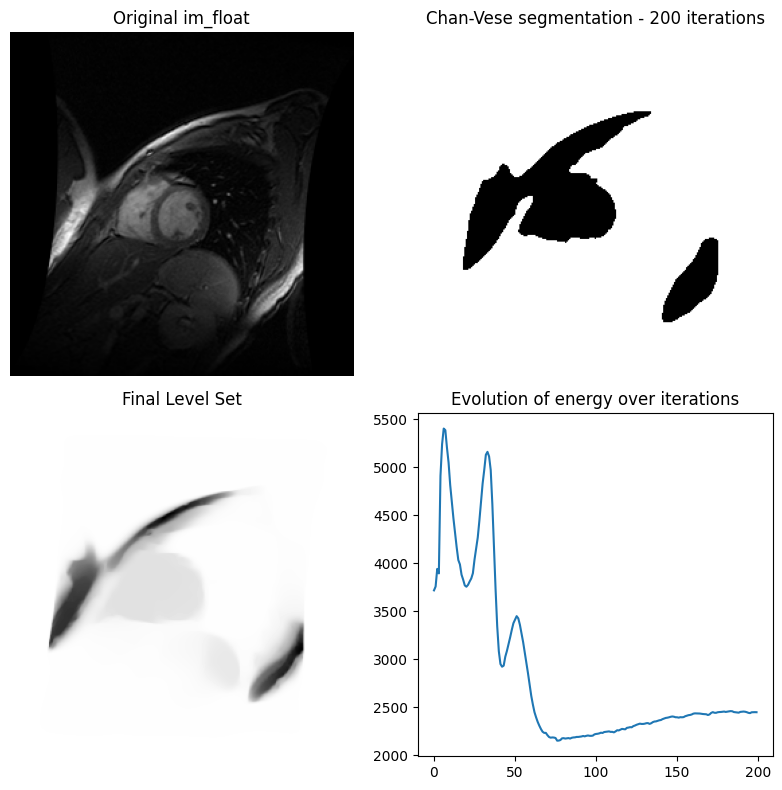

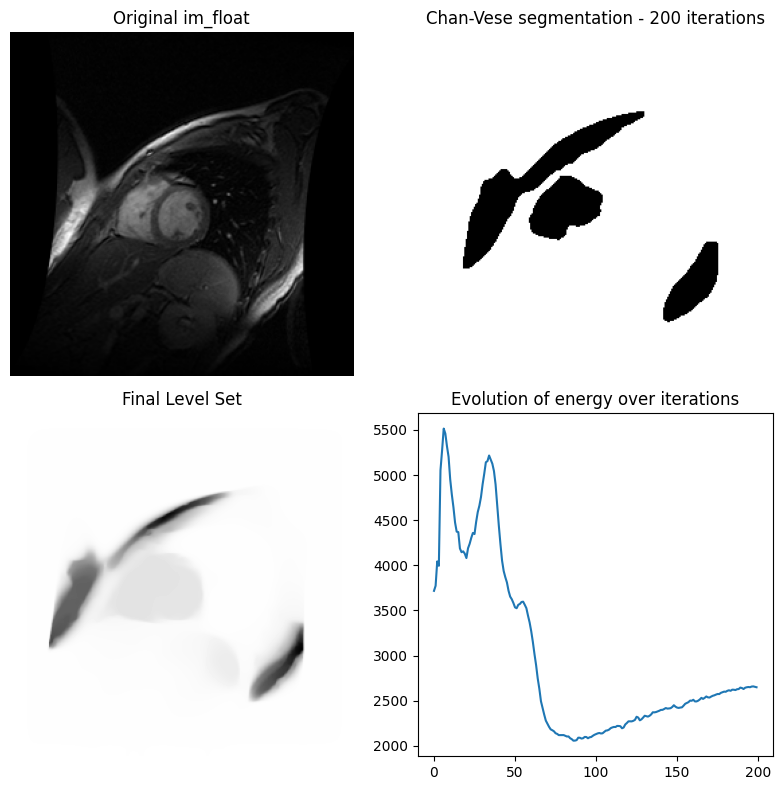

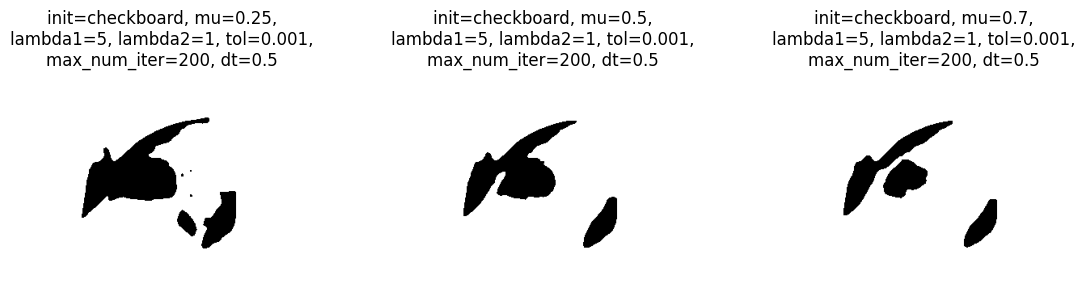

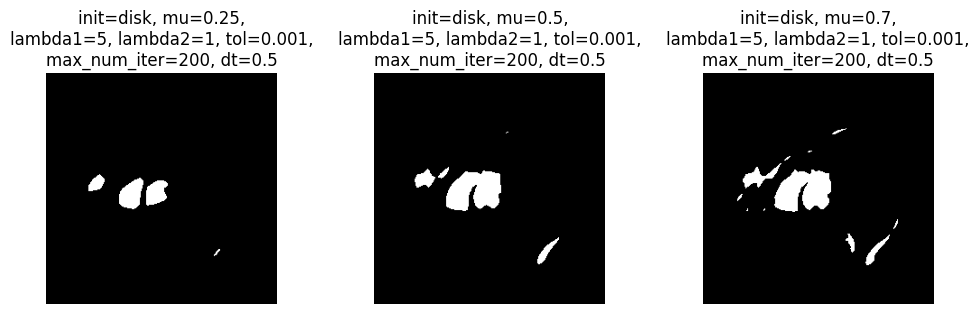

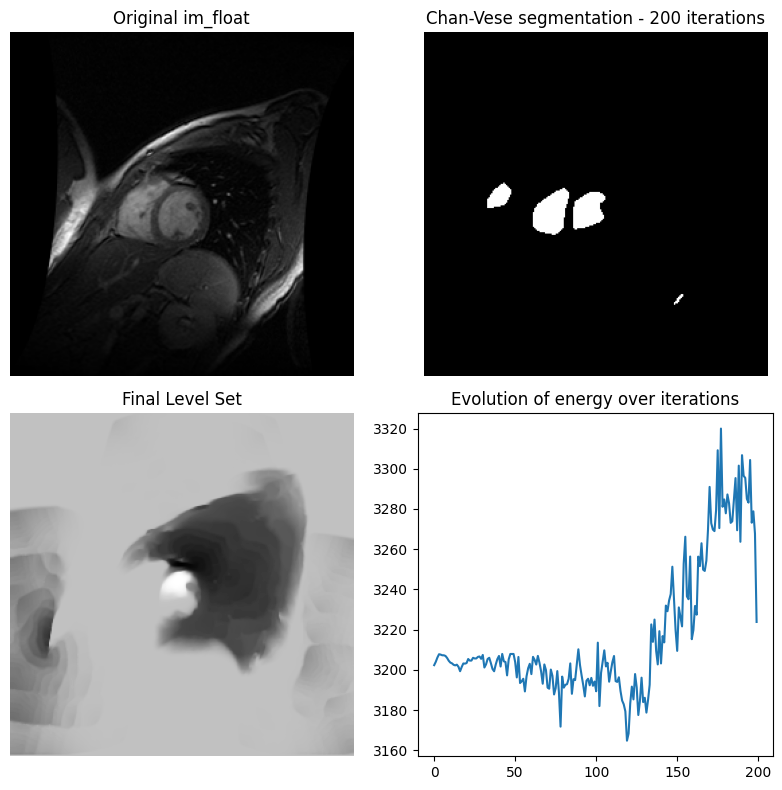

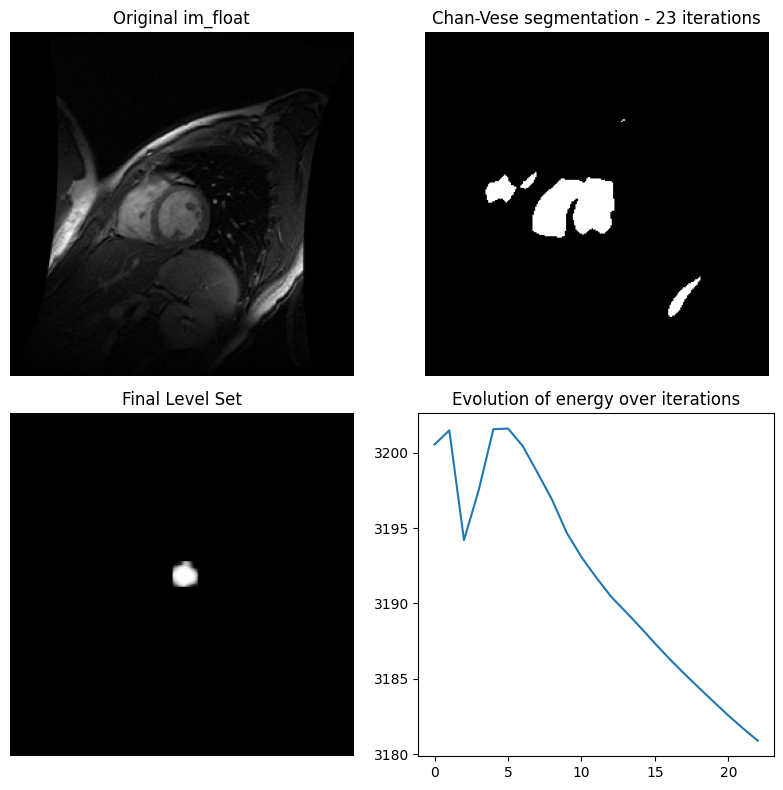

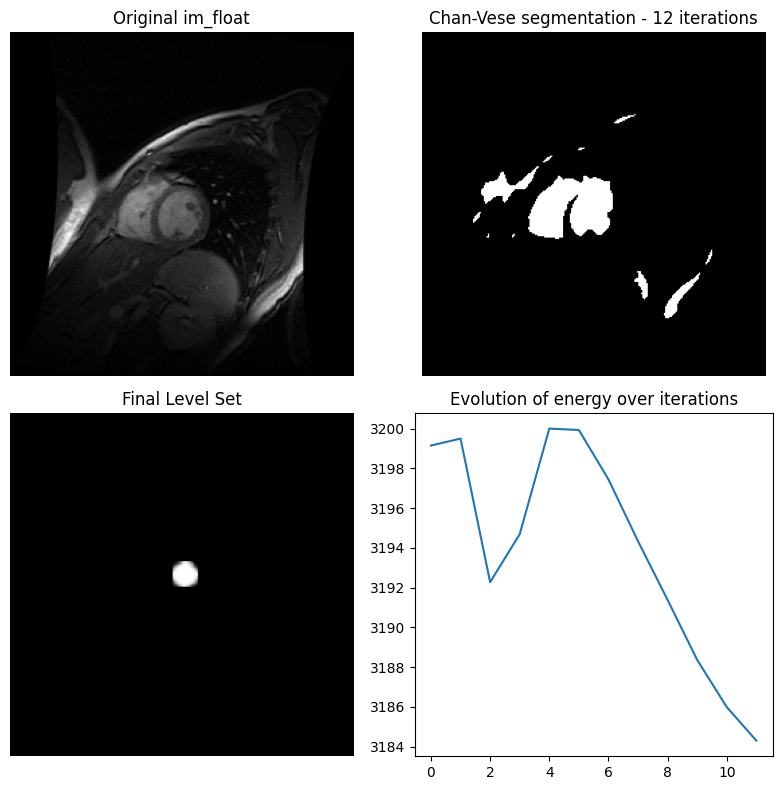

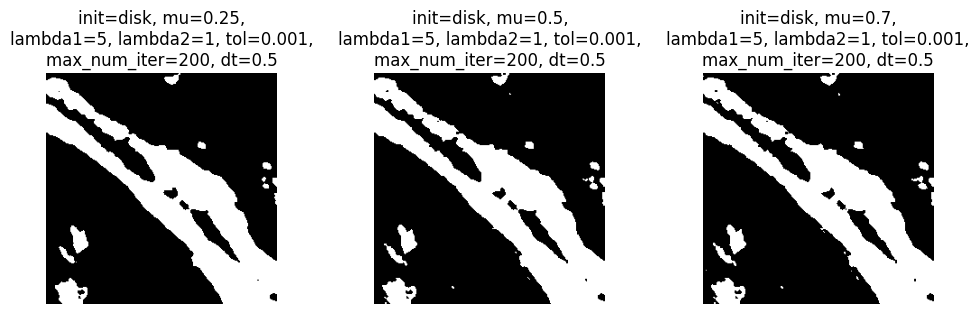

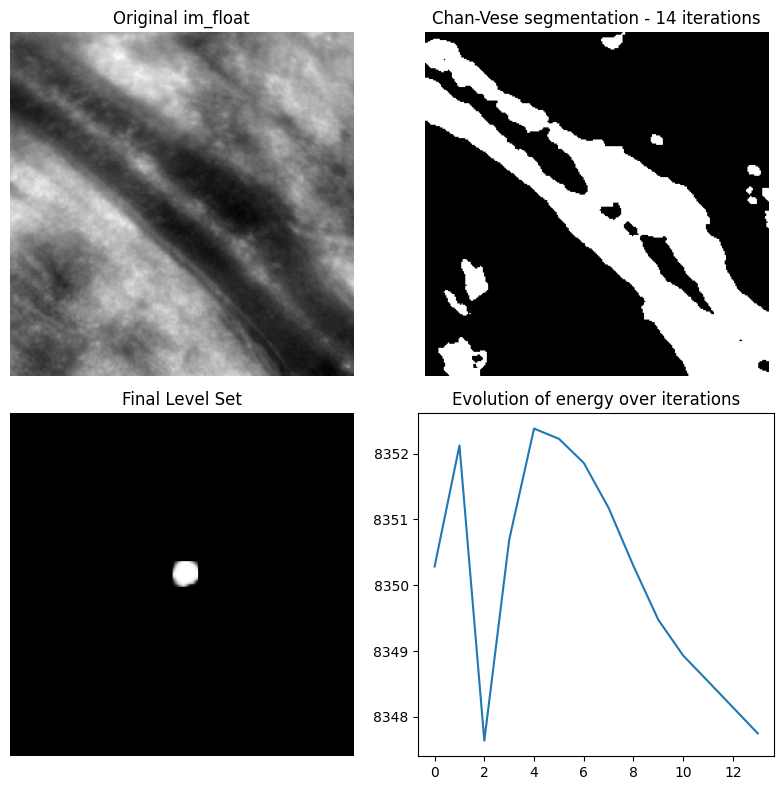

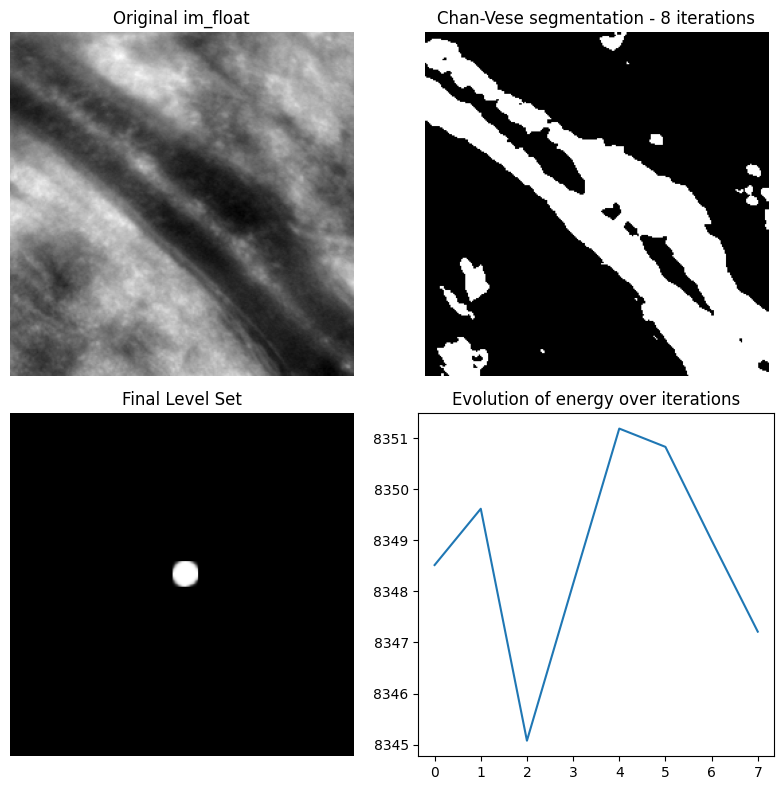

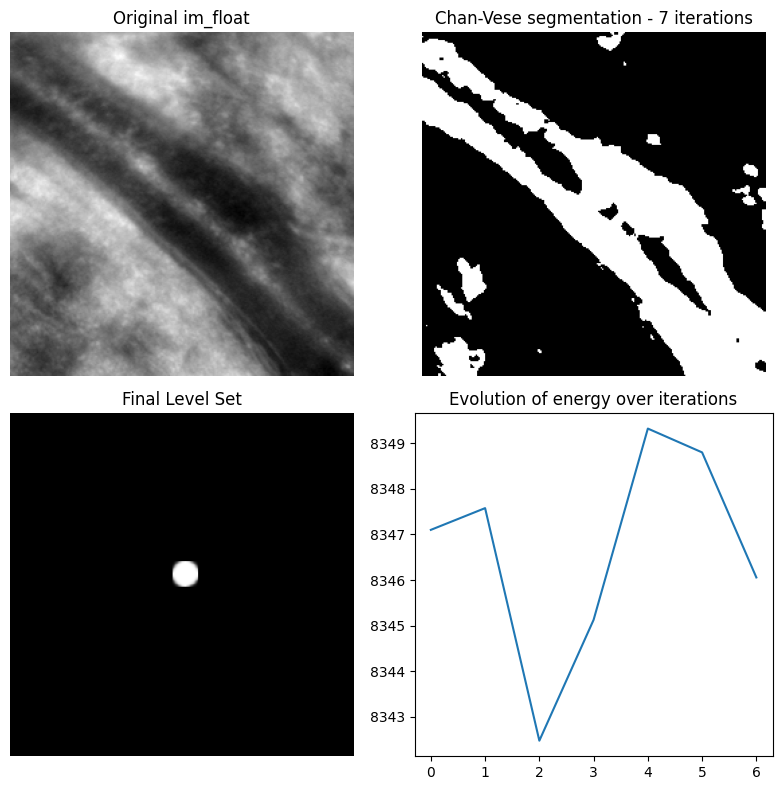

In [205]:
(def_init, def_mu, def_lambda1, def_lambda2, def_tol, def_max_num_iter, def_dt)= (["disk"], [0.25], [5], [1], [1e-3], [200], [0.5])
segm_level_set_varPar("images/coeurIRM.bmp", ["checkboard"], [0.25, 0.5, 0.7], [5], [1], [1e-3], [200], [0.5])
segm_level_set_varPar("images/coeurIRM.bmp", ["disk"], [0.25, 0.5, 0.7], [5], [1], [1e-3], [200], [0.5])
segm_level_set_varPar("images/retineOA.bmp", ["disk"], [0.25, 0.5, 0.7], [5], [1], [1e-3], [200], [0.5])